In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.drop(columns=["Id"],axis=1,inplace=True)

In [5]:
df.shape

(1460, 80)

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(df.isnull().sum())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
mean_value = df['LotFrontage'].mean()
df['LotFrontage'] = df['LotFrontage'].fillna(mean_value)


mean_value = df['MasVnrArea'].mean()
df["MasVnrArea"] = df['MasVnrArea'].fillna(mean_value)

mean_value = df['GarageYrBlt'].mean()
df["GarageYrBlt"] = df['GarageYrBlt'].fillna(mean_value)

In [9]:
mode_value = df['Alley'].mode()[0]
df['Alley'] = df['Alley'].fillna(mode_value)

mode_value = df['MasVnrType'].mode()[0]
df["MasVnrType"] = df['MasVnrType'].fillna(mode_value)

mode_value = df['BsmtQual'].mode()[0]
df["BsmtQual"] = df['BsmtQual'].fillna(mode_value)

mode_value = df['BsmtCond'].mode()[0]
df["BsmtCond"] = df['BsmtCond'].fillna(mode_value)


mode_value = df['BsmtExposure'].mode()[0]
df["BsmtExposure"] = df['BsmtExposure'].fillna(mode_value)


mode_value = df['BsmtFinType1'].mode()[0]
df["BsmtFinType1"] = df['BsmtFinType1'].fillna(mode_value)

mode_value = df['BsmtFinType2'].mode()[0]
df["BsmtFinType2"] = df['BsmtFinType2'].fillna(mode_value)

mode_value = df['Electrical'].mode()[0]
df["Electrical"] = df['Electrical'].fillna(mode_value)


mode_value = df["FireplaceQu"].mode()[0]
df["FireplaceQu"] = df['FireplaceQu'].fillna(mode_value)


mode_value = df["GarageType"].mode()[0]
df["GarageType"] = df['GarageType'].fillna(mode_value)


mode_value = df["GarageFinish"].mode()[0]
df["GarageFinish"] = df['GarageFinish'].fillna(mode_value)

mode_value = df["GarageQual"].mode()[0]
df["GarageQual"] = df['GarageQual'].fillna(mode_value)


mode_value = df["GarageCond"].mode()[0]
df["GarageCond"] = df['GarageCond'].fillna(mode_value)



mode_value = df["PoolQC"].mode()[0]
df["PoolQC"] = df['PoolQC'].fillna(mode_value)


mode_value = df["Fence"].mode()[0]
df["Fence"] = df['Fence'].fillna(mode_value)

mode_value = df["MiscFeature"].mode()[0]
df["MiscFeature"] = df['MiscFeature'].fillna(mode_value)

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(df.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [12]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Numeric columns:", numeric_columns)
print("\n\n")
print("Categorical columns:", categorical_columns)

Numeric columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']



Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 

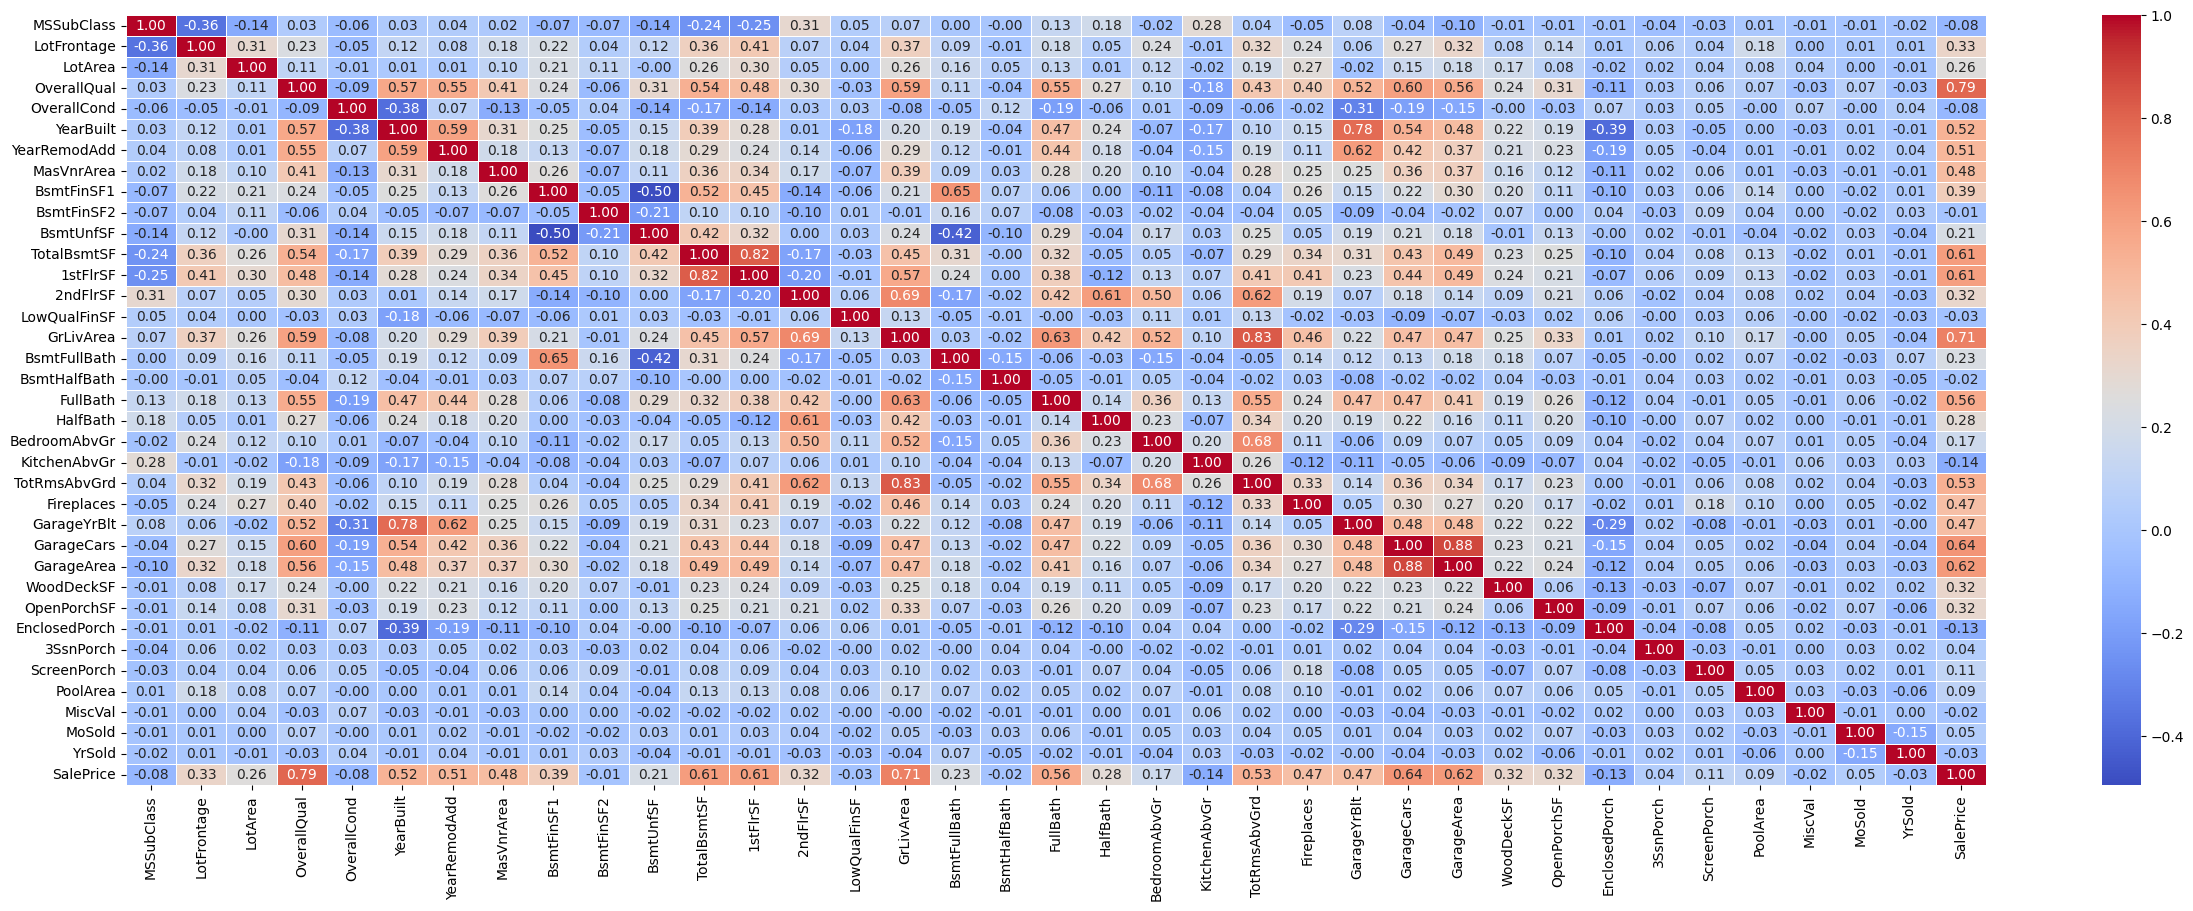

In [13]:
plt.figure(figsize=(30, 10))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

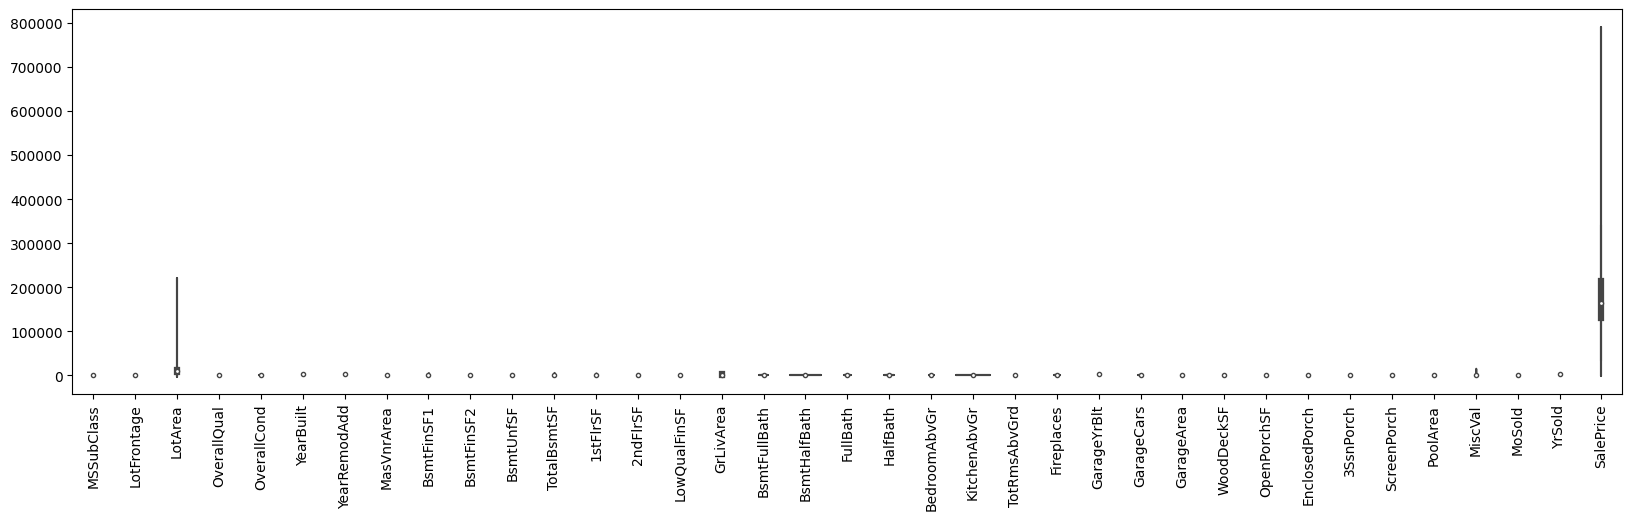

In [14]:
plt.figure(figsize=(20, 5))
sns.violinplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.show()


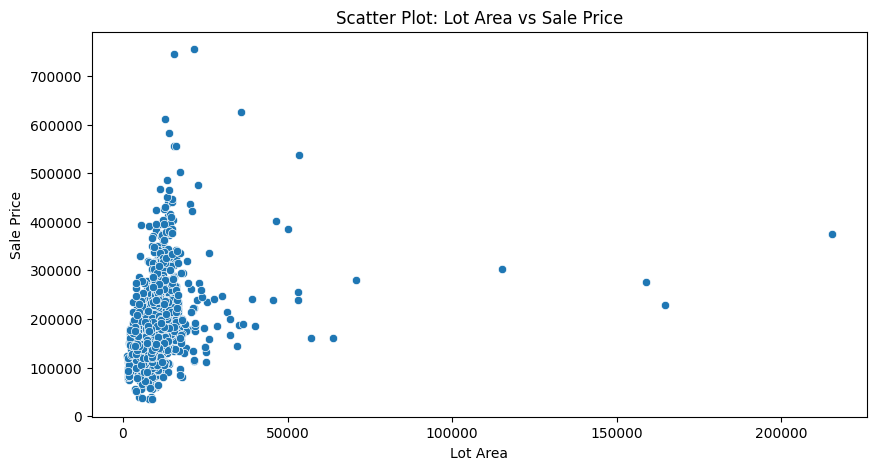

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['LotArea'], y=df['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot: Lot Area vs Sale Price')
plt.show()


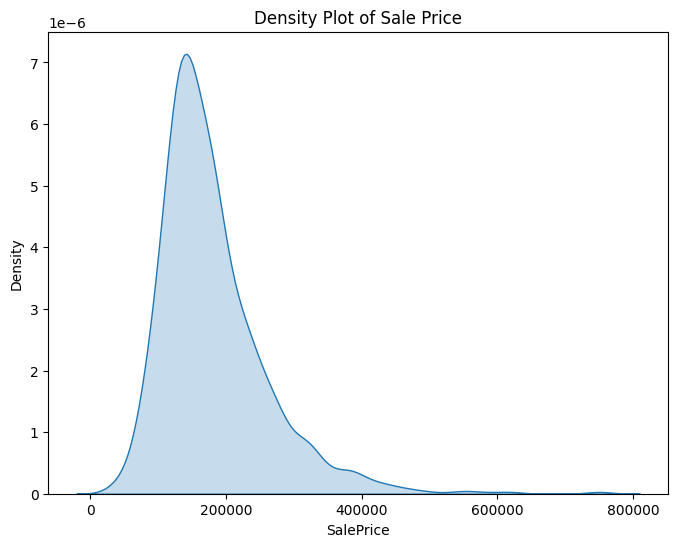

In [16]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['SalePrice'], shade=True)
plt.title('Density Plot of Sale Price')
plt.show()

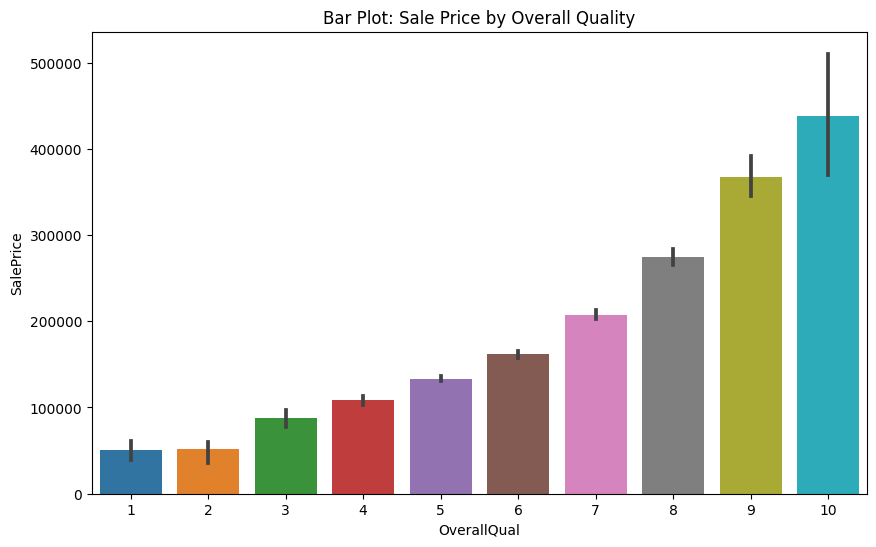

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Bar Plot: Sale Price by Overall Quality')
plt.show()


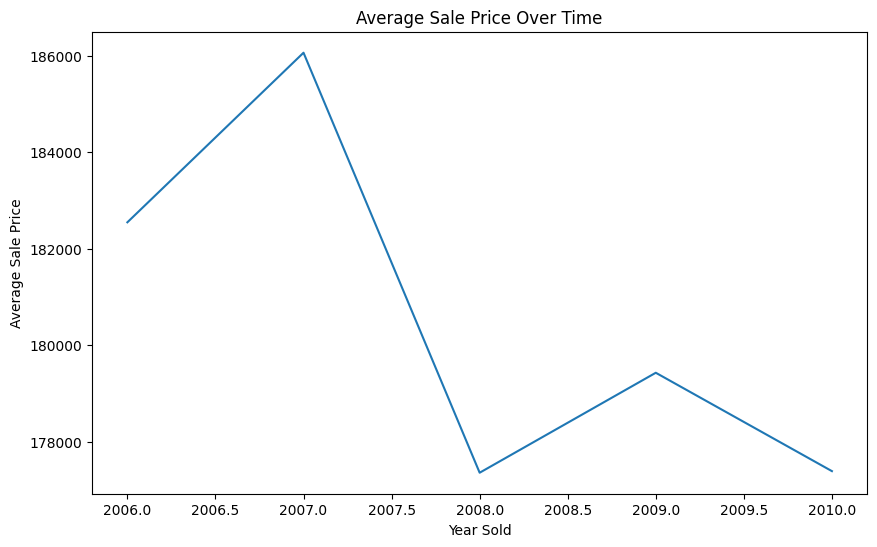

In [18]:
plt.figure(figsize=(10, 6))
df.groupby('YrSold')['SalePrice'].mean().plot(kind='line')
plt.title('Average Sale Price Over Time')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.show()


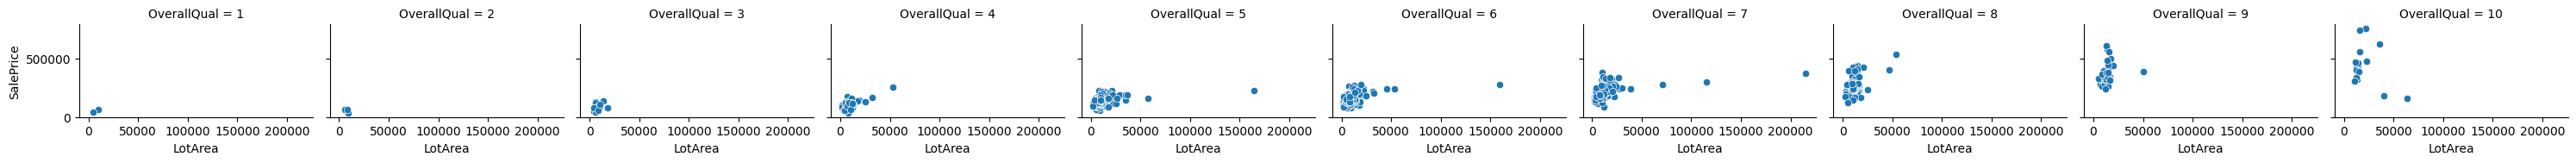

In [19]:
g = sns.FacetGrid(df, col="OverallQual", height=2, aspect=1.5)
g.map(sns.scatterplot, "LotArea", "SalePrice")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3544: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3544: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.9% of the points cannot be plac

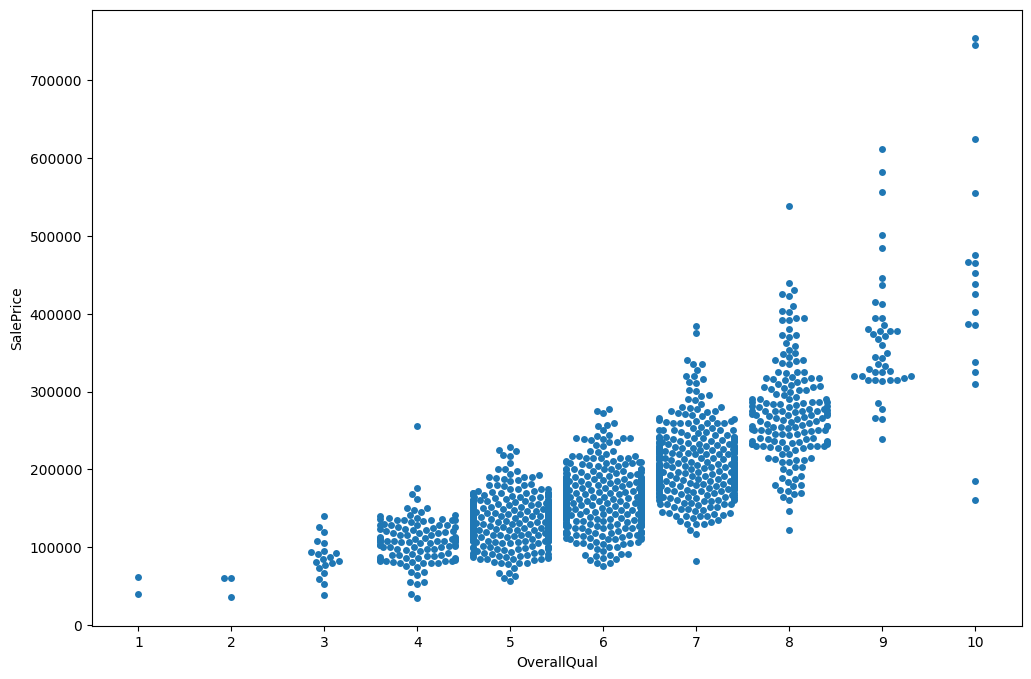

In [20]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x="OverallQual", y="SalePrice", data=df)
plt.show()


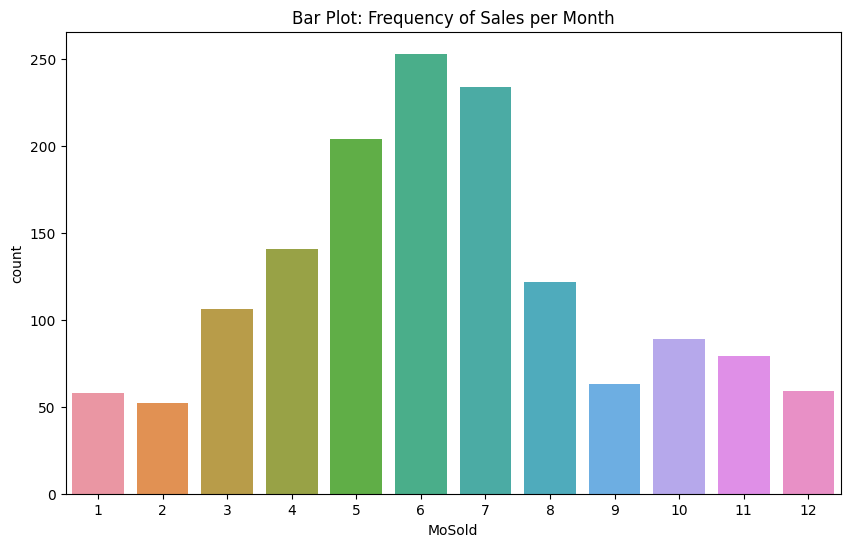

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MoSold', data=df)
plt.title('Bar Plot: Frequency of Sales per Month')
plt.show()


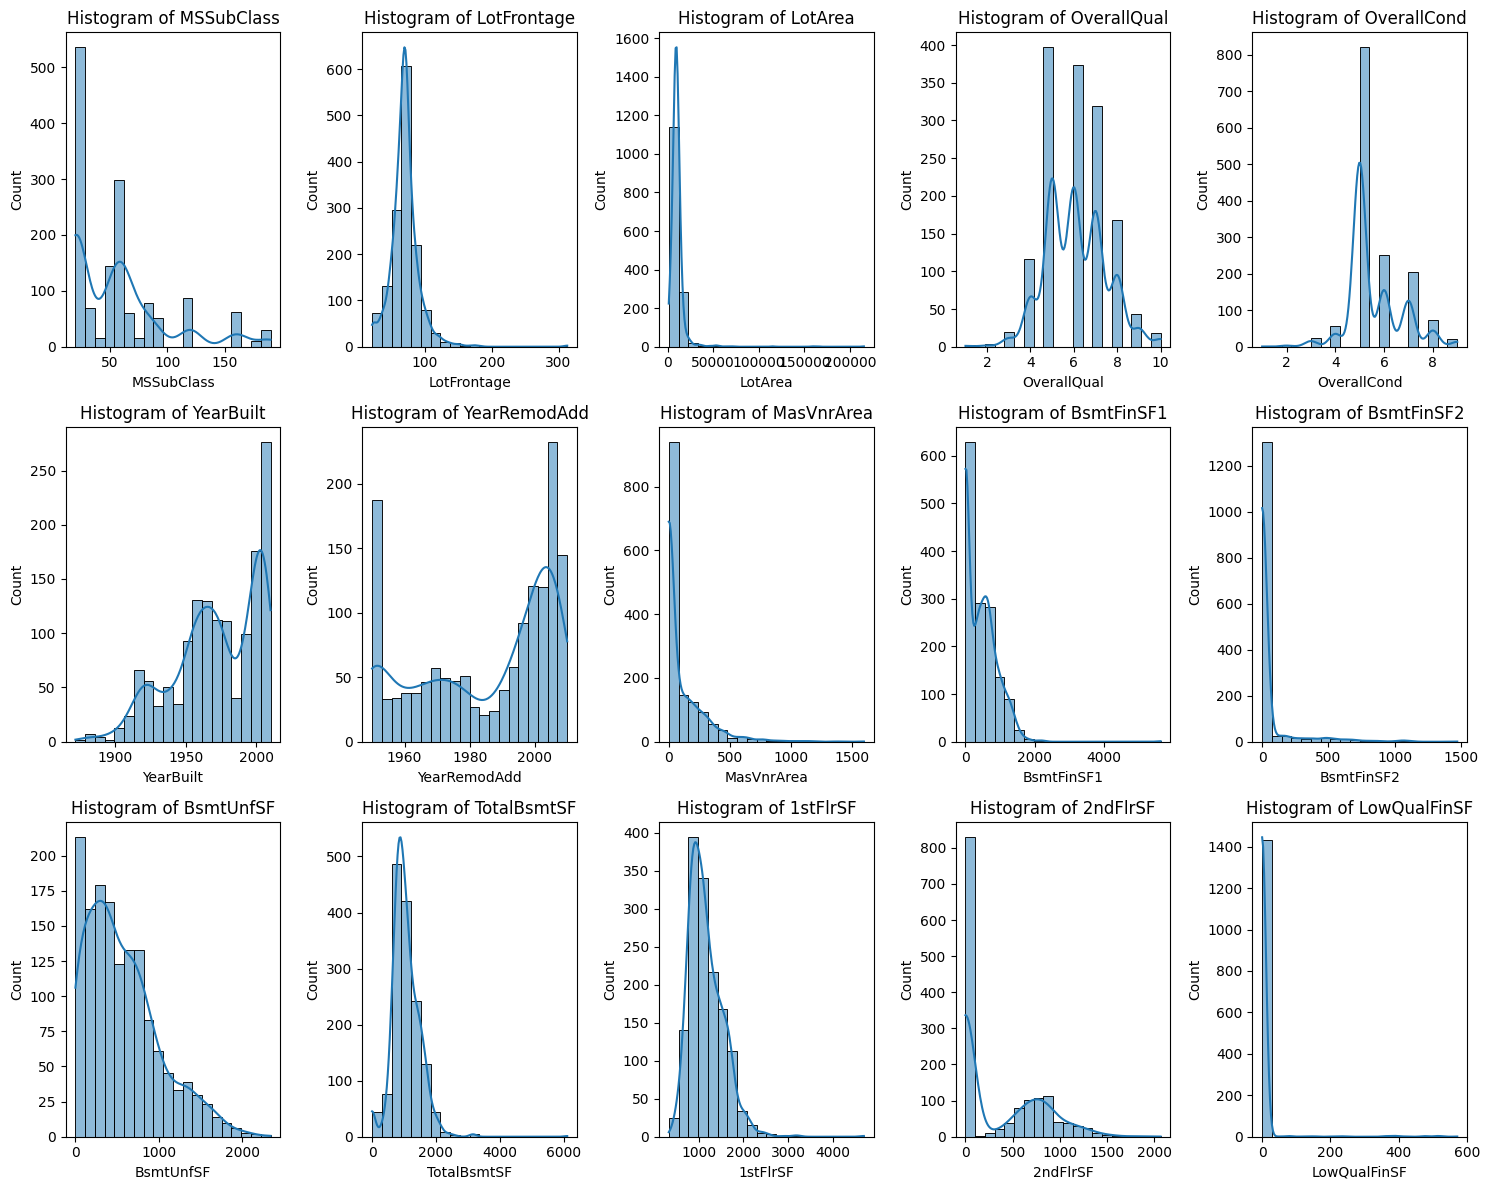

In [22]:
# Select the first 10 numeric columns
cols = numeric_columns[:15]

# Set up the figure size and grid
plt.figure(figsize=(15, 12))

# Create a histogram for each of the selected columns
for i, col in enumerate(cols, 1):
    plt.subplot(3, 5, i)  # 3 rows, 4 columns (adjust based on the number of plots)
    sns.histplot(df[col], kde=True, bins=20)  # Add a KDE (Kernel Density Estimate)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

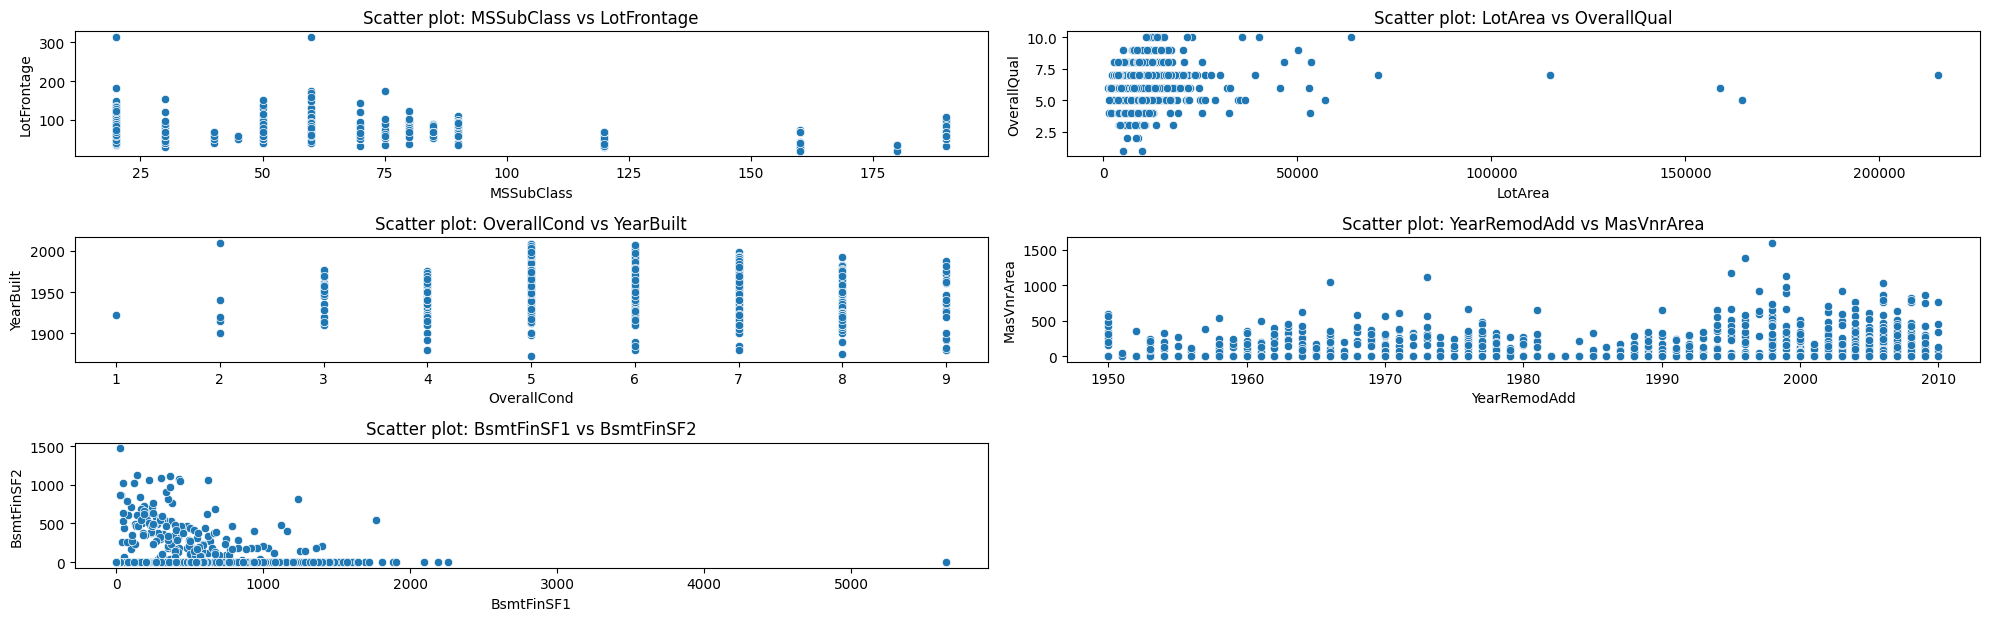

In [23]:
plt.figure(figsize=(20,10))

# Scatter plots for pairs of columns
for i in range(0, 10, 2):  # Step size of 2 to create pairs of columns
    plt.subplot(5, 2, i // 2 + 1)  # 5 rows, 2 columns
    sns.scatterplot(x=df[numeric_columns[i]], y=df[numeric_columns[i+1]])
    plt.title(f'Scatter plot: {numeric_columns[i]} vs {numeric_columns[i+1]}')

plt.tight_layout()
plt.show()

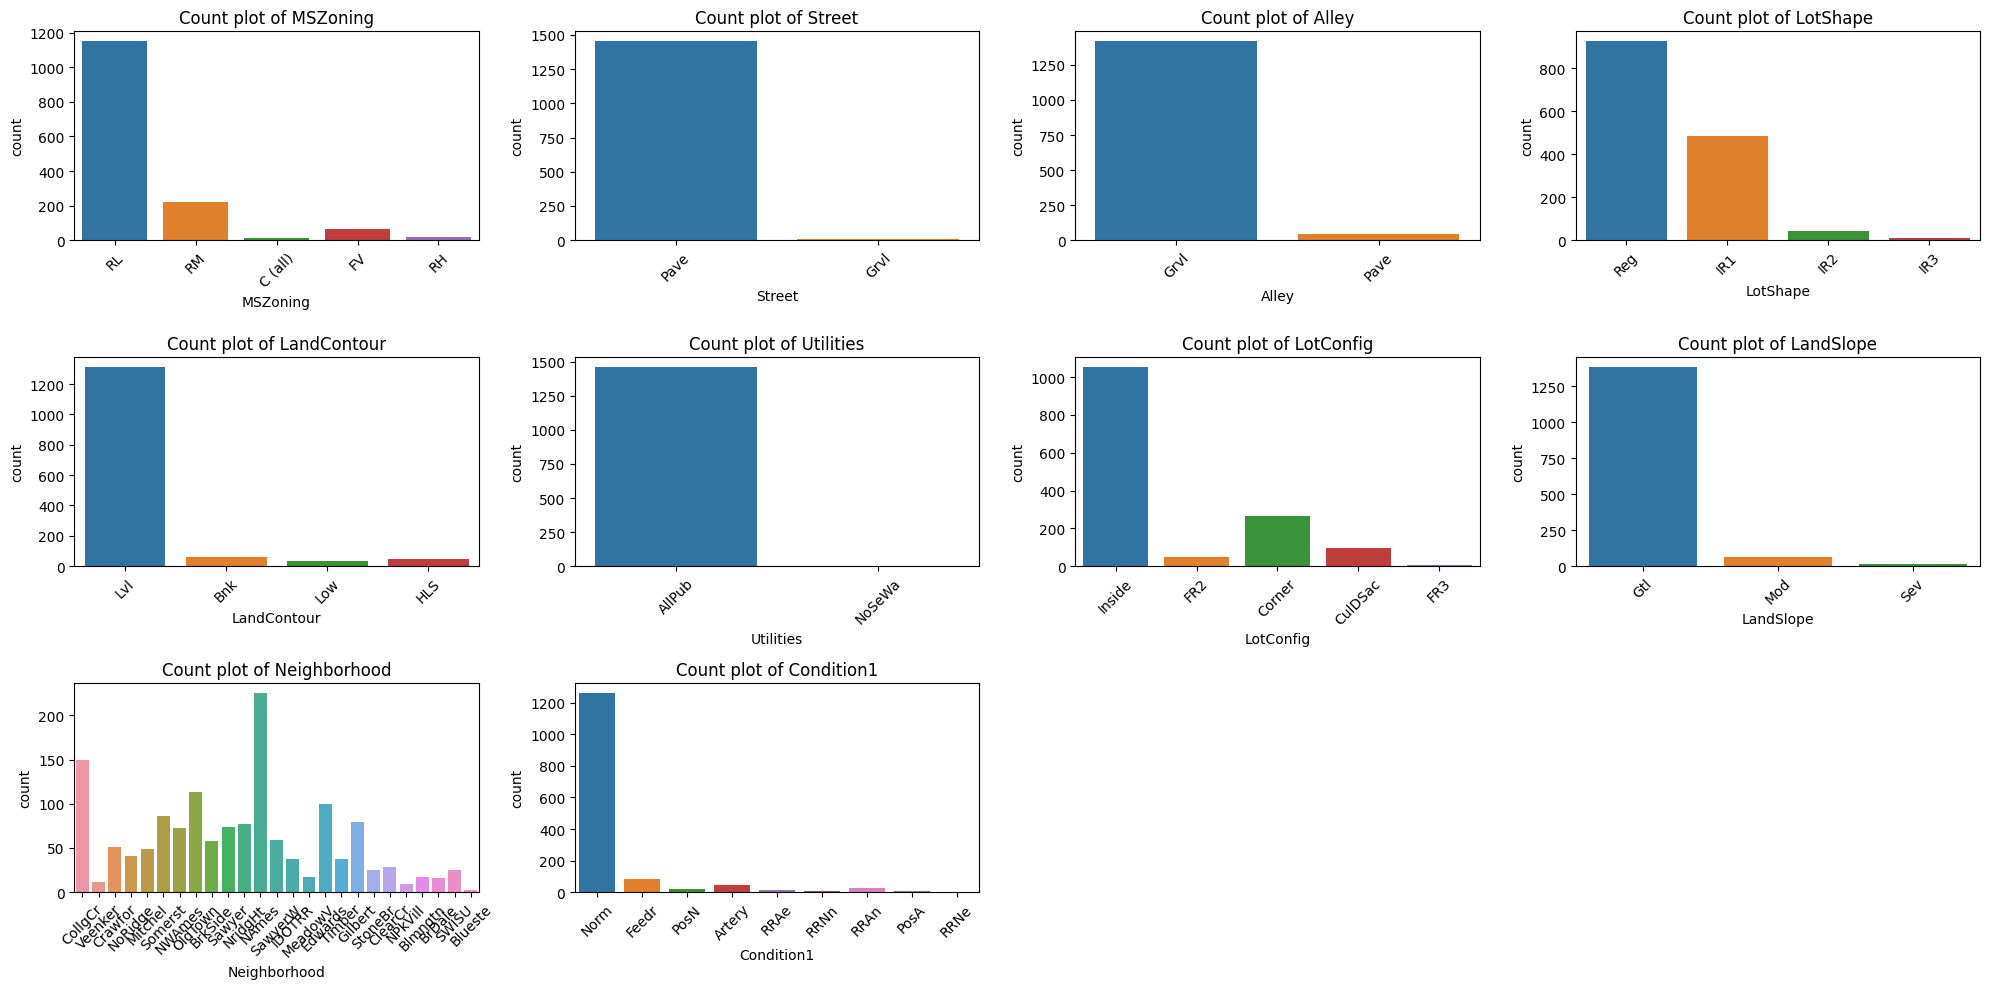

In [24]:
plt.figure(figsize=(20, 10))

for i, col in enumerate(categorical_columns[:10], 1):  # First 10 columns for example
    plt.subplot(3, 4, i)
    sns.countplot(x=df[col])
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

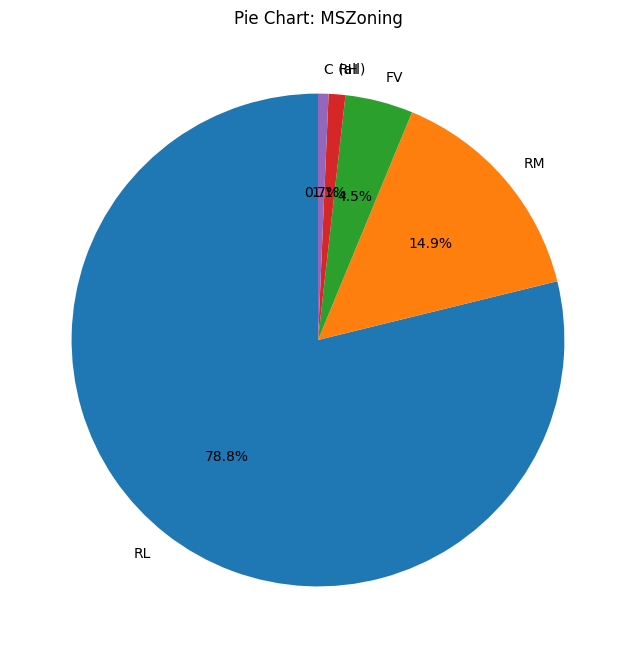

In [25]:
plt.figure(figsize=(8, 8))
df['MSZoning'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: MSZoning')
plt.ylabel('')
plt.show()

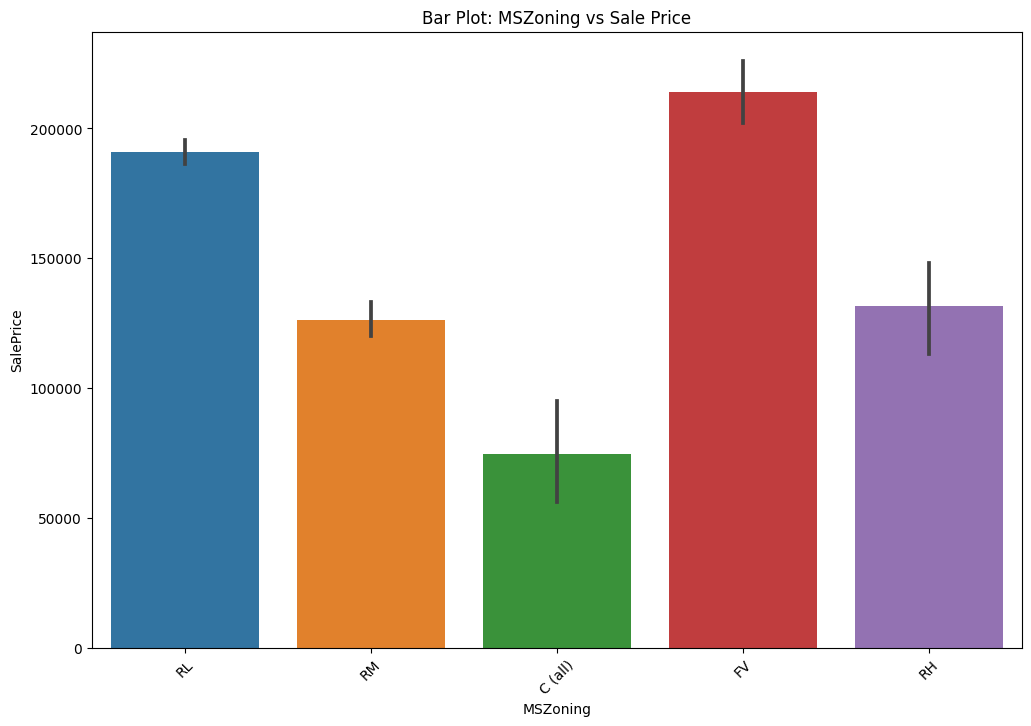

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='MSZoning', y='SalePrice', data=df)
plt.title('Bar Plot: MSZoning vs Sale Price')
plt.xticks(rotation=45)
plt.show()

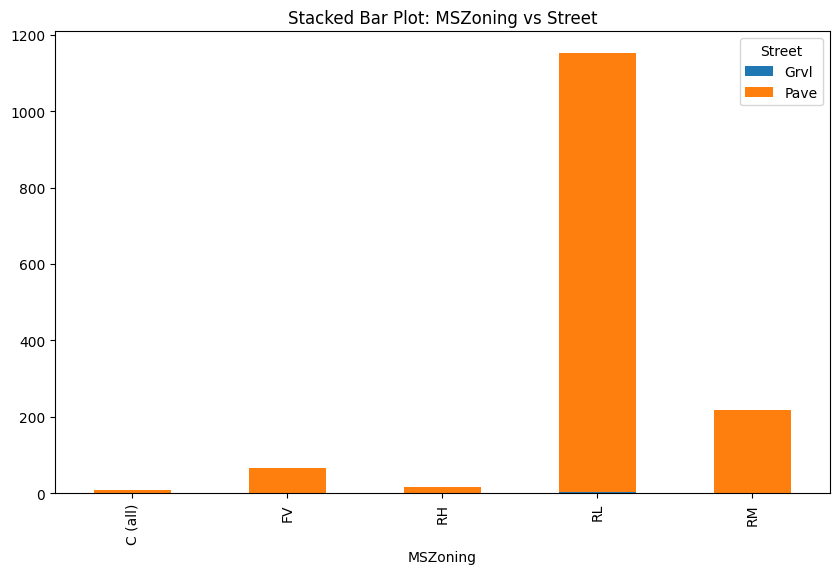

In [27]:
cross_tab = pd.crosstab(df['MSZoning'], df['Street'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot: MSZoning vs Street')
plt.show()

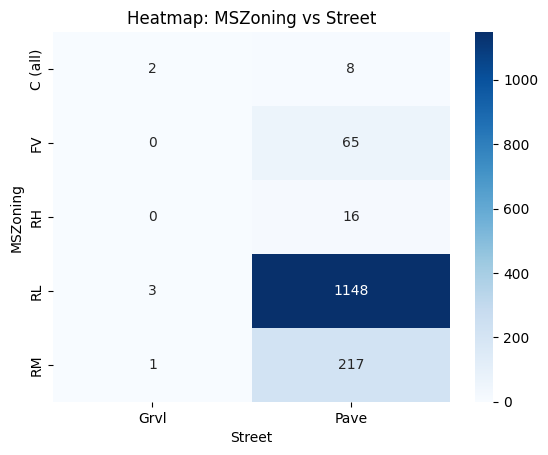

In [28]:
correlation_matrix = pd.crosstab(df['MSZoning'], df['Street'])
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap: MSZoning vs Street')
plt.show()

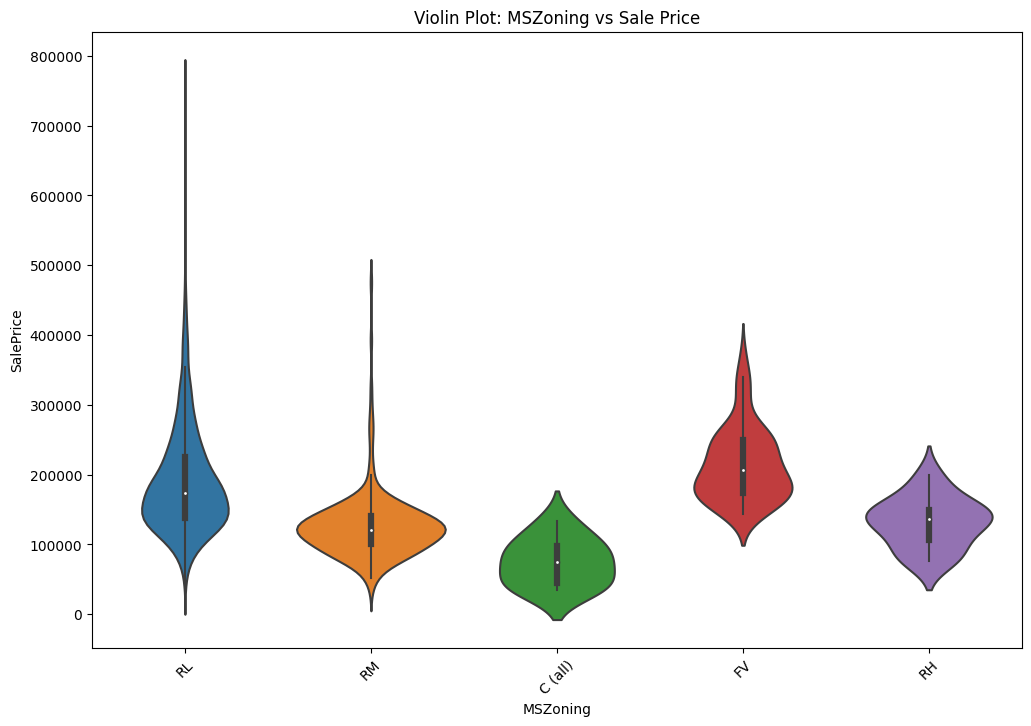

In [29]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='MSZoning', y='SalePrice', data=df)
plt.title('Violin Plot: MSZoning vs Sale Price')
plt.xticks(rotation=45)
plt.show()

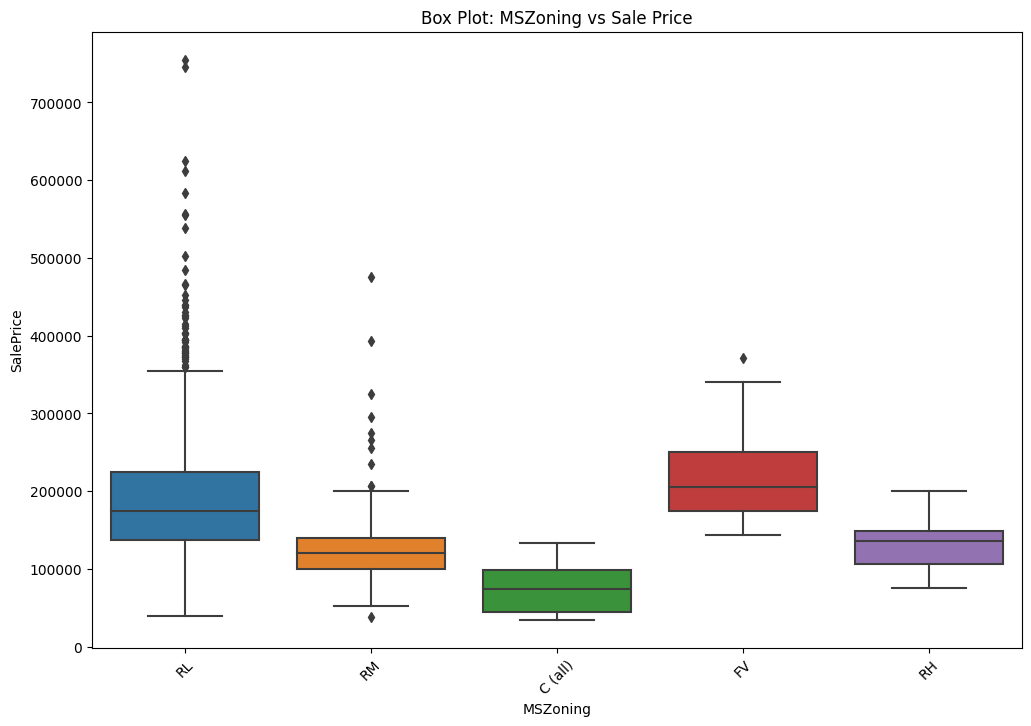

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.title('Box Plot: MSZoning vs Sale Price')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


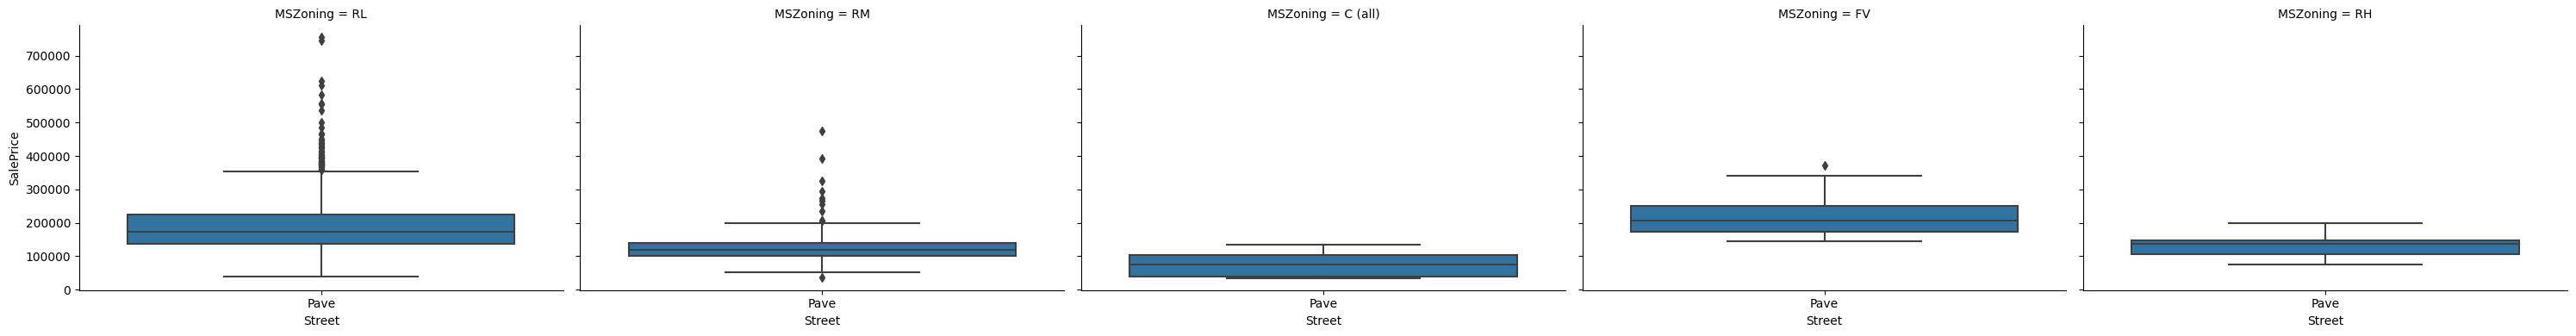

In [31]:
g = sns.FacetGrid(df, col="MSZoning", height=4, aspect=1.5)
g.map(sns.boxplot, "Street", "SalePrice")
plt.show()

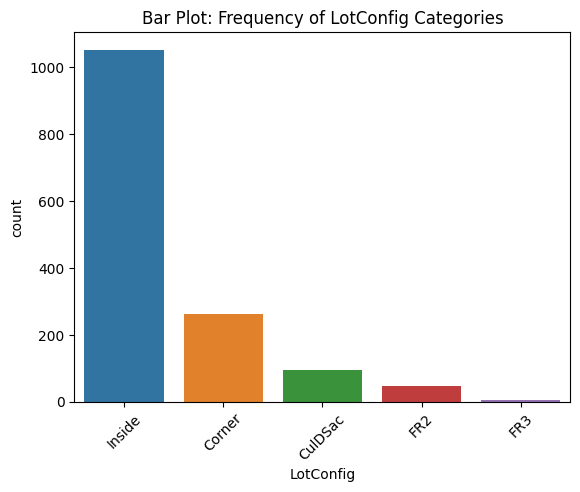

In [32]:
sns.barplot(x=df['LotConfig'].value_counts().index, y=df['LotConfig'].value_counts())
plt.title('Bar Plot: Frequency of LotConfig Categories')
plt.xticks(rotation=45)
plt.show()

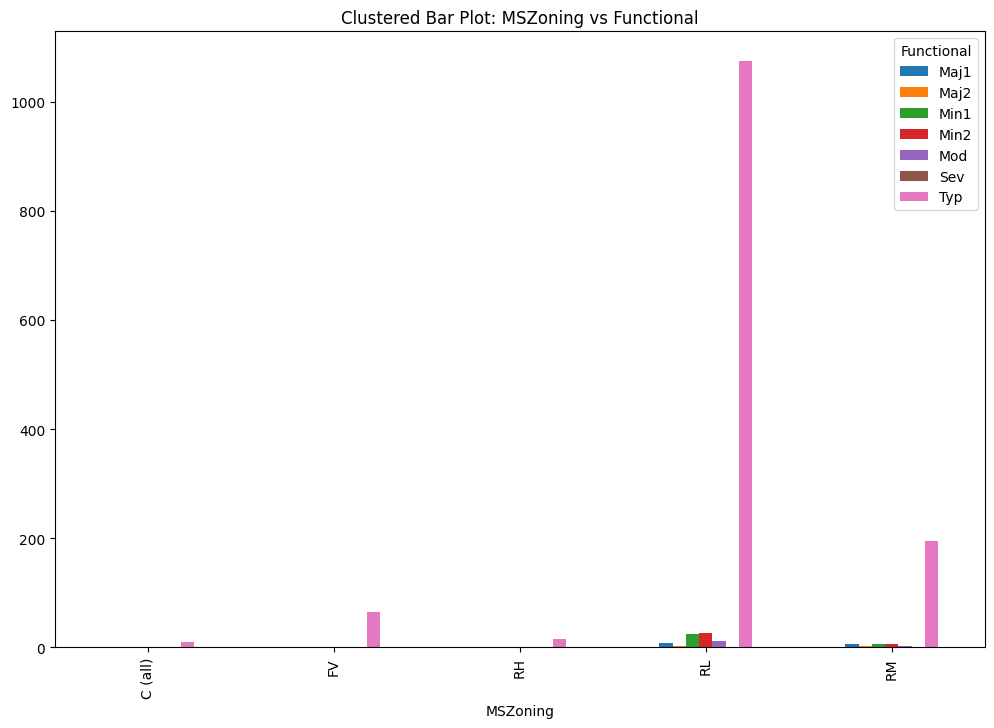

In [33]:
cross_tab = pd.crosstab(df['MSZoning'], df['Functional'])
cross_tab.plot(kind='bar', figsize=(12, 8))
plt.title('Clustered Bar Plot: MSZoning vs Functional')
plt.show()


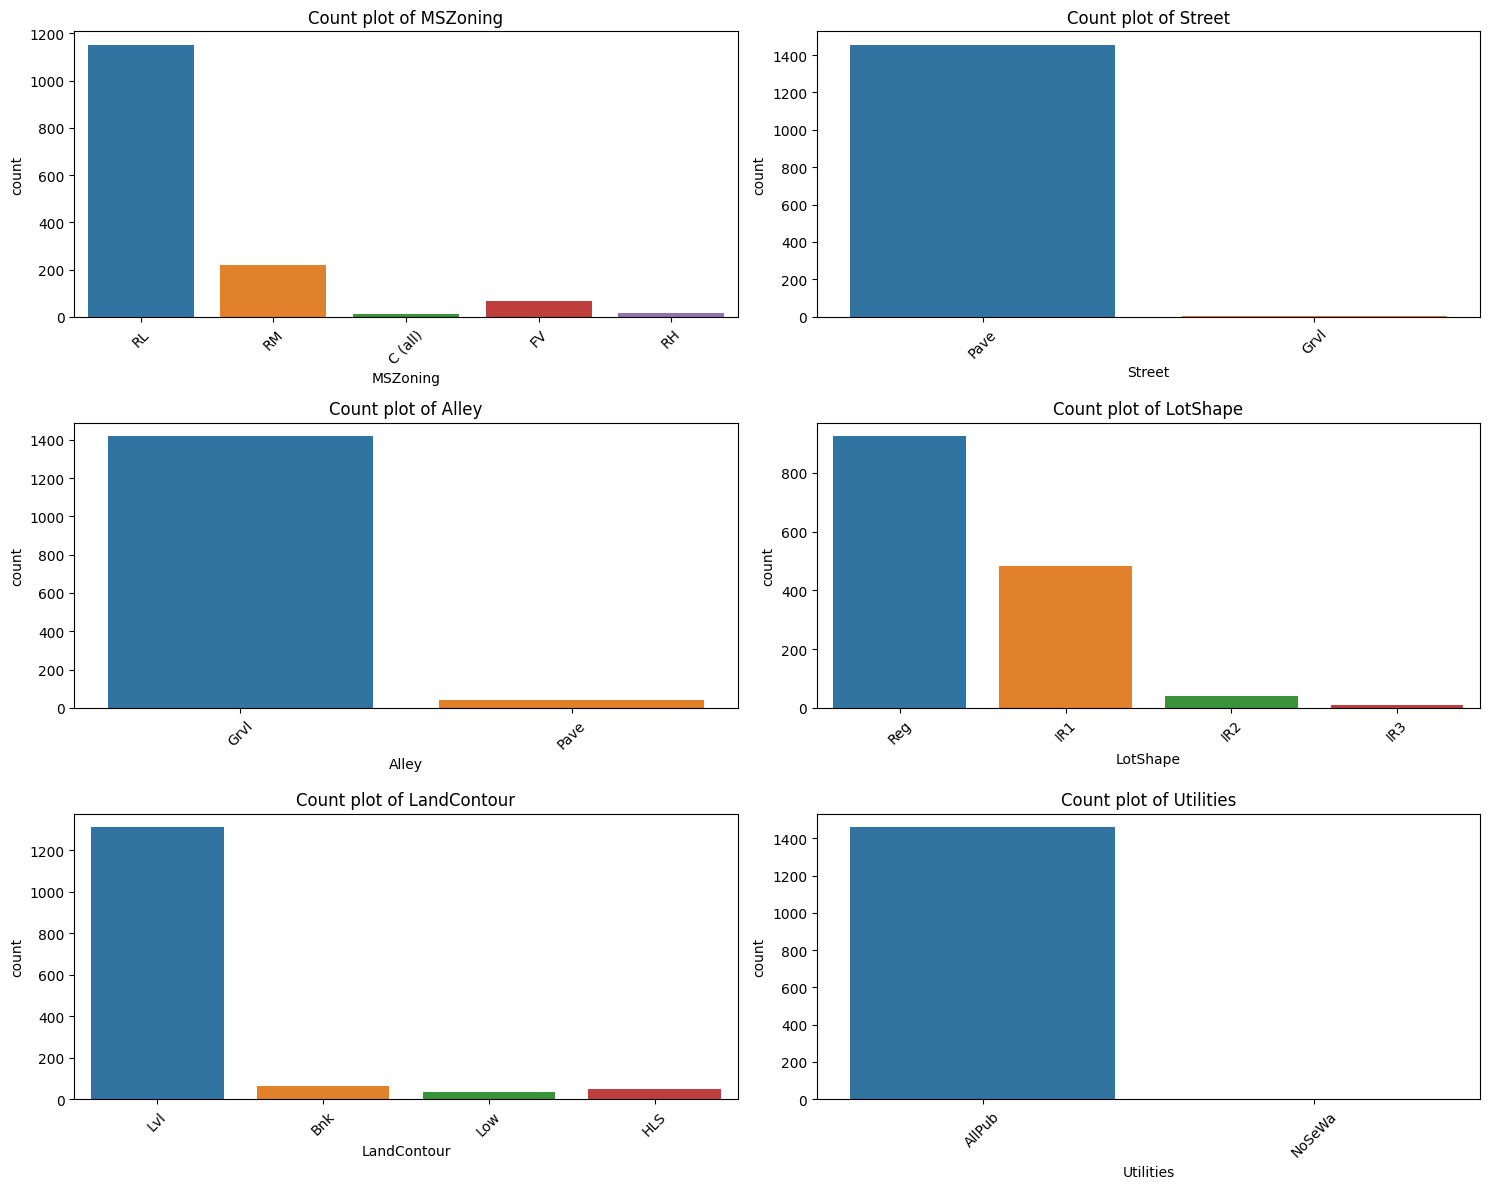

In [34]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns[:6], 1):  # First 6 columns
    plt.subplot(3, 2, i)
    sns.countplot(x=df[col])
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


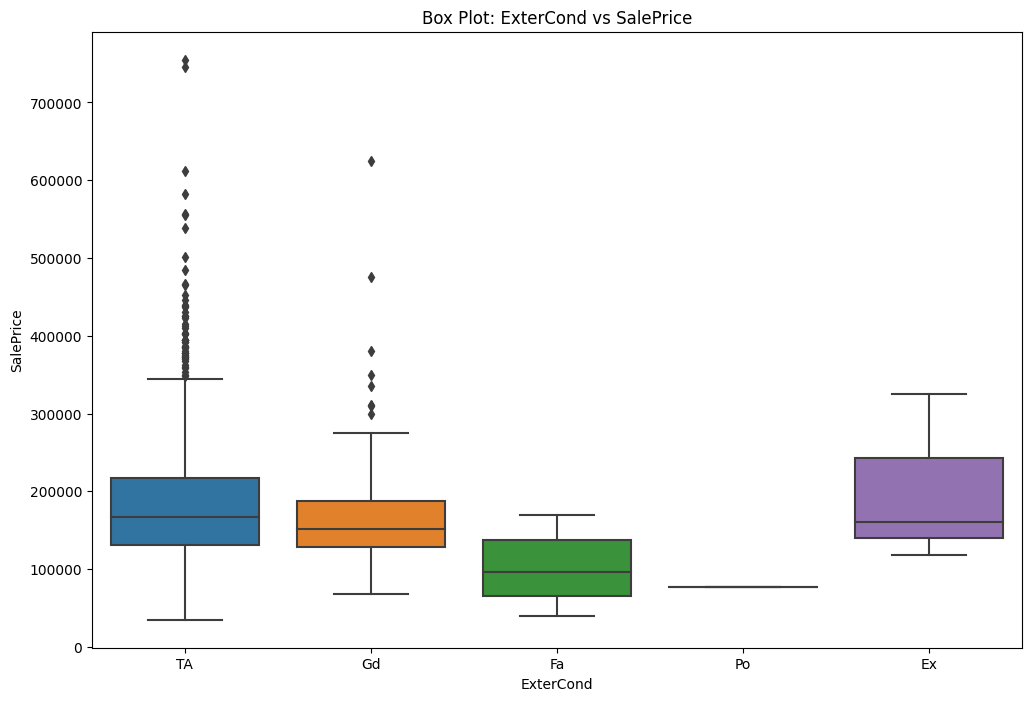

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='ExterCond', y='SalePrice', data=df)
plt.title('Box Plot: ExterCond vs SalePrice')
plt.show()


In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

scaler = MinMaxScaler()


numeric_columns_except_target = [col for col in numeric_columns if col != 'SalePrice']
df[numeric_columns_except_target] = scaler.fit_transform(df[numeric_columns_except_target])


In [37]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,3,0.150685,0.033420,1,0,3,3,0,4,0,5,2,2,0,5,0.666667,0.500,0.949275,0.883333,1,1,12,13,1,0.12250,2,4,2,2,3,3,2,0.125089,5,0.0,0.064212,0.140098,1,0,1,4,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,2,0.500000,6,0.000000,2,1,0.936364,1,0.50,0.386460,4,4,2,0.000000,0.111517,0.000000,0.0,0.0,0.0,2,2,2,0.0,0.090909,0.50,8,4,208500
1,0.000000,3,0.202055,0.038795,1,0,3,3,0,2,0,24,1,2,0,2,0.555556,0.875,0.753623,0.433333,1,1,8,8,1,0.00000,3,4,1,2,3,1,0,0.173281,5,0.0,0.121575,0.206547,1,0,1,4,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,3,0.333333,6,0.333333,4,1,0.690909,1,0.50,0.324401,4,4,2,0.347725,0.000000,0.000000,0.0,0.0,0.0,2,2,2,0.0,0.363636,0.25,8,4,181500
2,0.235294,3,0.160959,0.046507,1,0,0,3,0,4,0,5,2,2,0,5,0.666667,0.500,0.934783,0.866667,1,1,12,13,1,0.10125,2,4,2,2,3,2,2,0.086109,5,0.0,0.185788,0.150573,1,0,1,4,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,2,0.333333,6,0.333333,4,1,0.918182,1,0.50,0.428773,4,4,2,0.000000,0.076782,0.000000,0.0,0.0,0.0,2,2,2,0.0,0.727273,0.50,8,4,223500
3,0.294118,3,0.133562,0.038561,1,0,0,3,0,0,0,6,2,2,0,5,0.666667,0.500,0.311594,0.333333,1,1,13,15,1,0.00000,3,4,0,3,1,3,0,0.038271,5,0.0,0.231164,0.123732,1,2,1,4,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,2,0.416667,6,0.333333,2,5,0.890909,2,0.75,0.452750,4,4,2,0.000000,0.063985,0.492754,0.0,0.0,0.0,2,2,2,0.0,0.090909,0.00,8,0,140000
4,0.235294,3,0.215753,0.060576,1,0,0,3,0,2,0,15,2,2,0,5,0.777778,0.500,0.927536,0.833333,1,1,12,13,1,0.21875,2,4,2,2,3,0,2,0.116052,5,0.0,0.209760,0.187398,1,0,1,4,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,2,0.583333,6,0.333333,4,1,0.909091,1,0.75,0.589563,4,4,2,0.224037,0.153565,0.000000,0.0,0.0,0.0,2,2,2,0.0,1.000000,0.50,8,4,250000


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = df.drop(columns=["SalePrice"],axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(10)

,Feature,Importance
16,OverallQual,0.556554
45,GrLivArea,0.120837
37,TotalBsmtSF,0.035233
43,2ndFlrSF,0.034253
33,BsmtFinSF1,0.029574
42,1stFlrSF,0.025807
3,LotArea,0.017234
61,GarageArea,0.016339
18,YearBuilt,0.012350
60,GarageCars,0.011803


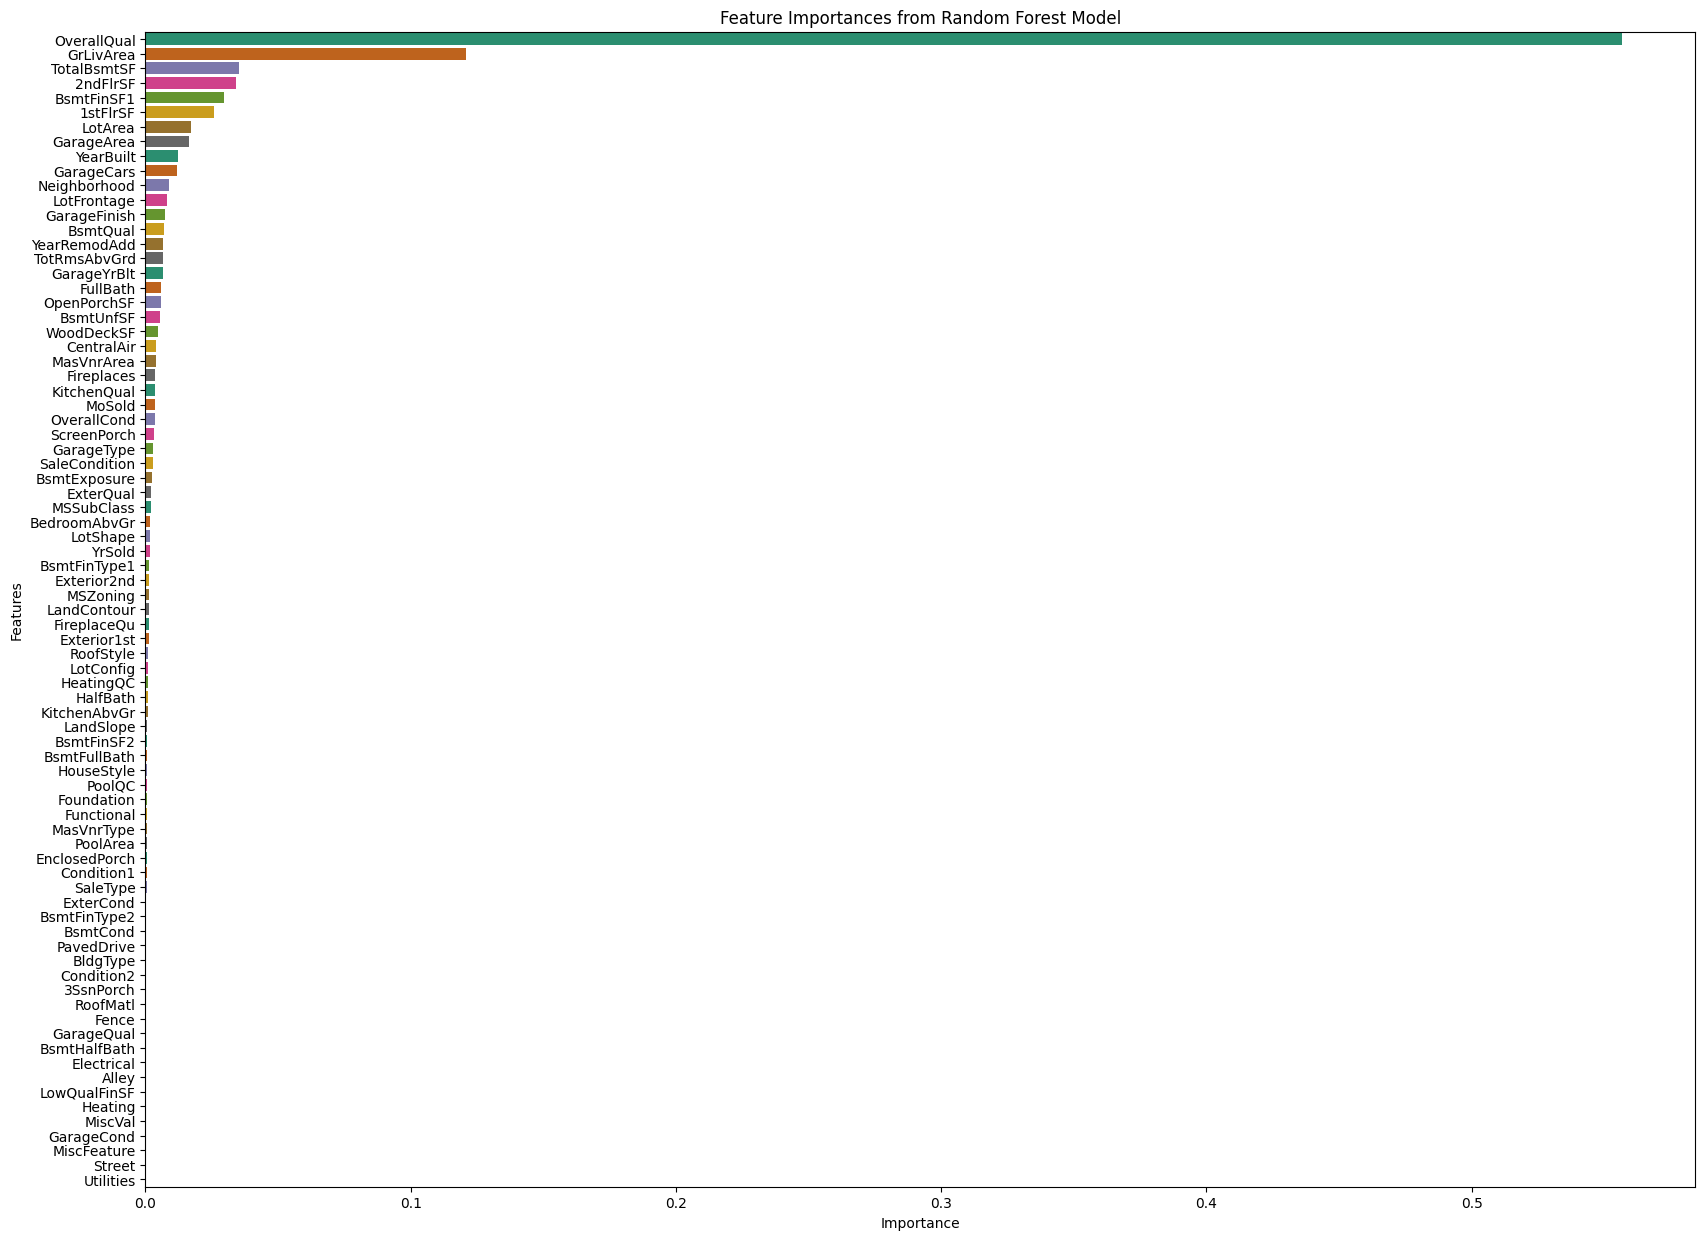

In [39]:
plt.figure(figsize=(20,15))
sns.barplot(x='Importance', y='Feature', data=importance_df,palette="Dark2")
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [40]:
top_10_features=importance_df["Feature"].head(10).tolist()
X_top_10=X[top_10_features]
new_data=X_top_10.copy()
new_data["SalePrice"]=y
new_data.head()

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,YearBuilt,GarageCars,SalePrice
0,0.666667,0.259231,0.140098,0.413559,0.125089,0.119780,0.033420,0.386460,0.949275,0.50,208500
1,0.555556,0.174830,0.206547,0.000000,0.173281,0.212942,0.038795,0.324401,0.753623,0.50,181500
2,0.666667,0.273549,0.150573,0.419370,0.086109,0.134465,0.046507,0.428773,0.934783,0.50,223500
3,0.666667,0.260550,0.123732,0.366102,0.038271,0.143873,0.038561,0.452750,0.311594,0.75,140000
4,0.777778,0.351168,0.187398,0.509927,0.116052,0.186095,0.060576,0.589563,0.927536,0.75,250000


# CatBoostRegressor

In [41]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

X_new = new_data.drop(columns=["SalePrice"], axis=1)
y_new = new_data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

model = CatBoostRegressor(iterations=2000, learning_rate=0.1, depth=6, random_state=42,verbose=500)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

0:	learn: 72063.4881678	total: 49.4ms	remaining: 1m 38s
500:	learn: 7984.8562916	total: 756ms	remaining: 2.26s
1000:	learn: 4119.4193244	total: 1.48s	remaining: 1.47s
1500:	learn: 2462.4710157	total: 2.2s	remaining: 731ms
1999:	learn: 1574.1825596	total: 2.88s	remaining: 0us


In [42]:
import pickle

with open('catboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Explained Variance Score (EVS): {evs}')

Mean Squared Error (MSE): 819232987.7886288
Mean Absolute Error (MAE): 18668.13271990746
R^2 Score: 0.8931945049454345
Root Mean Squared Error (RMSE): 28622.246379147615
Explained Variance Score (EVS): 0.893566255996343


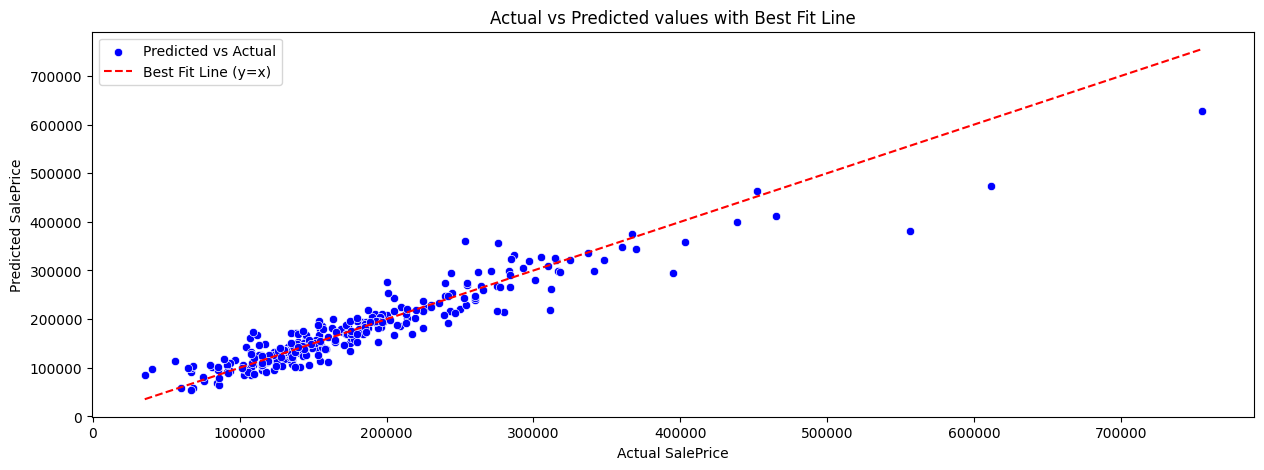

In [44]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Best Fit Line (y=x)')

plt.title('Actual vs Predicted values with Best Fit Line')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.show()

# Initialize the XGBRegressor model

In [45]:
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test, y_pred)

# Print all the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Explained Variance Score (EVS): {evs}')

Mean Squared Error (MSE): 820476996.7229398
Mean Absolute Error (MAE): 19014.091462435787
R^2 Score: 0.8930323203263312
Root Mean Squared Error (RMSE): 28643.96963975035
Explained Variance Score (EVS): 0.8930709221219579


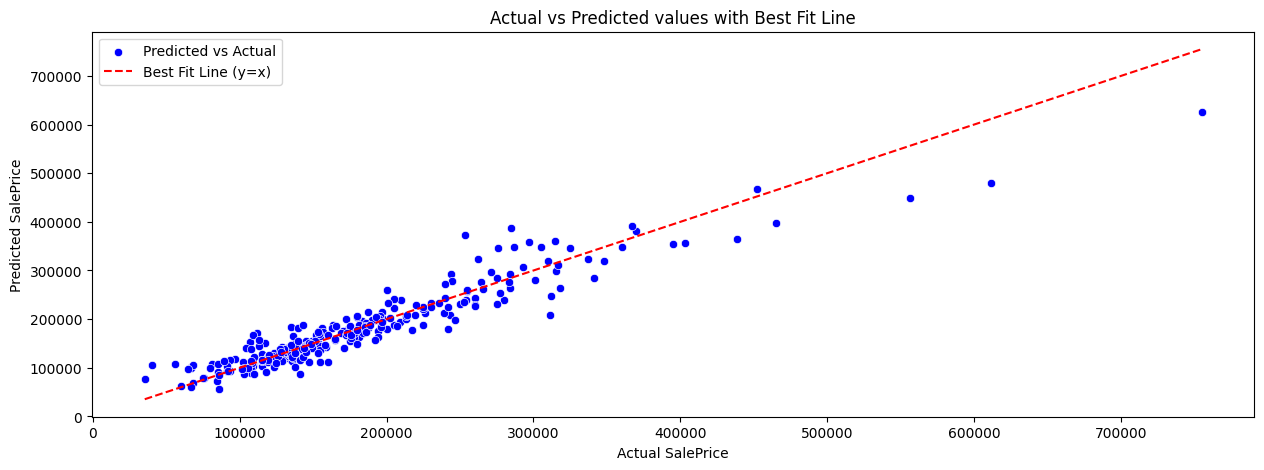

In [47]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Best Fit Line (y=x)')

plt.title('Actual vs Predicted values with Best Fit Line')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.show()

# Model 3

In [48]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Explained Variance Score (EVS): {evs}')

Mean Squared Error (MSE): 1293573604.3835616
Mean Absolute Error (MAE): 24090.328767123287
R^2 Score: 0.8313535083851482
Root Mean Squared Error (RMSE): 35966.28427268463
Explained Variance Score (EVS): 0.8313544397305476


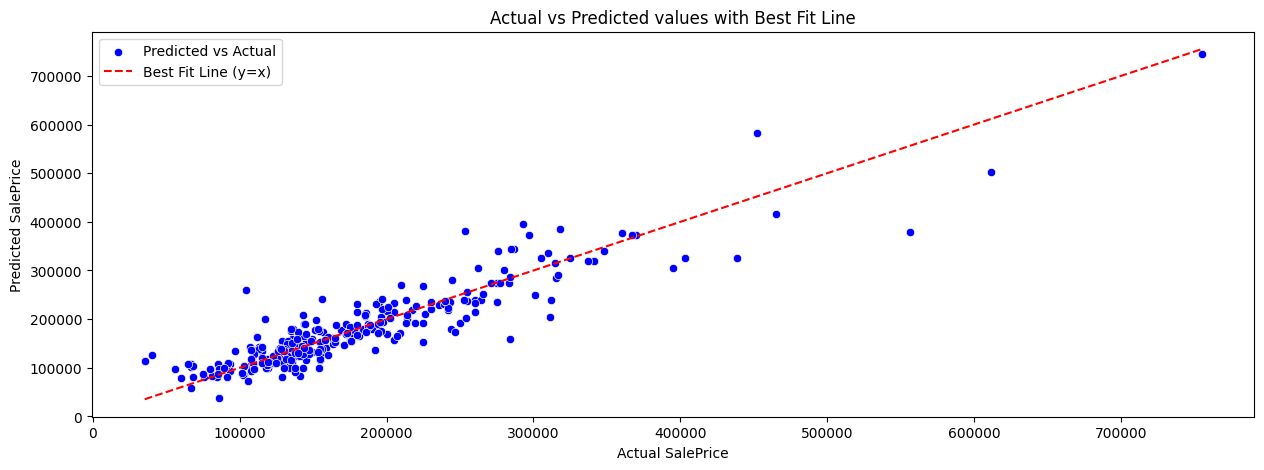

In [50]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Best Fit Line (y=x)')
plt.title('Actual vs Predicted values with Best Fit Line')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.show()

# Read Test Data

In [51]:
df_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [52]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [53]:
my_id=df_test.Id

In [54]:
df_test.drop(columns=["Id"],axis=1,inplace=True)

In [55]:
col=["OverallQual","GrLivArea","TotalBsmtSF","2ndFlrSF","BsmtFinSF1","1stFlrSF","LotArea","GarageArea","YearBuilt","GarageCars"]
df_test=df_test[col]

In [56]:
df_test.head()

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,LotArea,GarageArea,YearBuilt,GarageCars
0,5,896,882.0,0,468.0,896,11622,730.0,1961,1.0
1,6,1329,1329.0,0,923.0,1329,14267,312.0,1958,1.0
2,5,1629,928.0,701,791.0,928,13830,482.0,1997,2.0
3,6,1604,926.0,678,602.0,926,9978,470.0,1998,2.0
4,8,1280,1280.0,0,263.0,1280,5005,506.0,1992,2.0


In [57]:
df_test.isnull().sum()

OverallQual    0
GrLivArea      0
TotalBsmtSF    1
2ndFlrSF       0
BsmtFinSF1     1
1stFlrSF       0
LotArea        0
GarageArea     1
YearBuilt      0
GarageCars     1
dtype: int64

In [58]:
mean_value = df_test['TotalBsmtSF'].mean()
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(mean_value)

mean_value = df_test['BsmtFinSF1'].mean()
df_test["BsmtFinSF1"] = df_test['BsmtFinSF1'].fillna(mean_value)

mean_value = df_test['GarageArea'].mean()
df_test["GarageArea"] = df_test['GarageArea'].fillna(mean_value)

mean_value = df_test['GarageCars'].mean()
df_test["GarageCars"] = df_test['GarageCars'].fillna(mean_value)

In [59]:
df_test.isnull().sum()

OverallQual    0
GrLivArea      0
TotalBsmtSF    0
2ndFlrSF       0
BsmtFinSF1     0
1stFlrSF       0
LotArea        0
GarageArea     0
YearBuilt      0
GarageCars     0
dtype: int64

In [60]:
predict=model.predict(df_test)
submission=pd.DataFrame({"Id":my_id,"SalePrice":predict})
submission.to_csv("my_submission.csv",index=False)

In [61]:
submission.head()

,Id,SalePrice
0,1461,275557.447247
1,1462,275557.447247
2,1463,365102.141432
3,1464,365102.141432
4,1465,275557.447247


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl  # Corrected import for version check
import numpy as np
import warnings
import os
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import catboost
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Import sklearn to check version
import sklearn

# Check version of each package
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", mpl.__version__)  # Corrected version check
print("numpy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)
print("catboost version:", catboost.__version__)
print("xgboost version:", xgb.__version__)


pandas version: 2.2.3
seaborn version: 0.12.2
matplotlib version: 3.7.5
numpy version: 1.26.4
scikit-learn version: 1.2.2
catboost version: 1.2.7
xgboost version: 2.0.3
